In [ ]:
#カスケードファイルの確認
import cv2
def show_cascade_imge(img_path, cascade_path):
    cascade = cv2.cascadeclassifier(cascade_path)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    grayed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    objs = cacade.detectMultiScale(grayed, 1.1, 3)
    print(len(objs))
    for (x,y,w,h) in objs:
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.imshow('window',img)
        
        TARGET_URL = (r'C:\Users\HN4-00012\Documents\kosen fike\卒業研究\マイクロチューブ内の界面画像\sample.jpg')
        CASCADE_URL = (r'C:\Users\HN4-00012\Documents\cascade\opencv-haar-classifier-training\model\cascade.xml')       
        img = show_cascade_image(TARGET_URL, CASCADE_URL)
        
        
cv2.waitKey(0)
cv2.destroyAllWindows()

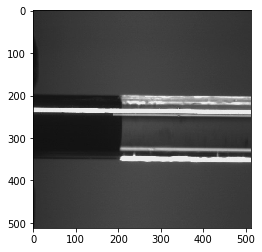

AttributeError: 'NoneType' object has no attribute 'astype'

In [6]:

import cv2
import sys
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
 
#入力ファイルのパスを指定
in_jpg = (r"C:\Users\HN4-00012\Documents\kosen fike\卒業研究\マイクロチューブ内の界面画像\sample.jpg")
out_jpg = (r"C:\Users\HN4-00012\Documents\kosen fike\卒業研究\マイクロチューブ内の界面画像\sample1.jpg")
 
#入力画像の表示
plt.show(plt.imshow(np.asarray(Image.open(in_jpg))))
 
# 画像の読み込み 
image = cv2.imread(in_jpg)

 
# グレースケールに変換
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# 界面認識用特徴量ファイルを読み込む --- （カスケードファイルのパスを指定）
cascade = cv2.CascadeClassifier(r"C:\Users\HN4-00012\Documents\cascade\opencv-haar-classifier-training\model\cascade.xml")
#cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_eye.xml")
# 界面認識の実行
face_list = cascade.detectMultiScale(image_gs,
    scaleFactor=1.1,
    minNeighbors=1,
    minSize=(100,100))
 
if len(face_list) > 0:
    # 認識した部分を赤色で囲む
    print(face_list)
    color = (0, 0, 255)
    for face in face_list:
        x,y,w,h = face
        cv2.rectangle(image, (x,y), (x+w, y+h), color, thickness=3)
    # 描画結果をファイルに書き込む
    cv2.imwrite(out_jpg, image)
    
else:
    print("no face")
    
#出力画像の表示
plt.show(plt.imshow(np.asarray(Image.open(out_jpg))))

In [1]:
import sys
import cv2 

'''
参考
@link http://ensekitt.hatenablog.com/entry/2017/12/19/200000
@link https://note.nkmk.me/python-opencv-face-detection-haar-cascade/
@link https://note.nkmk.me/python-opencv-mosaic/
@link http://workpiles.com/2015/04/opencv-detectmultiscale-scalefactor/
'''

# VideoCaptureのインスタンスを作成する。
# 引数でカメラを選べれる。今回は動画を指定する
cap = cv2.VideoCapture(r'C:\Users\HN4-00012\Documents\kosen fike\卒業研究\マイクロチューブ内の実験データ\mc_10_3_C001H001S0001 (2).avi')

if cap.isOpened() is False:
    print("can not open camera")
    sys.exit()

# 作成したカスケードファイルの読み込み
# https://github.com/opencv/opencv/tree/master/data/haarcascades
cascade = cv2.CascadeClassifier(r"C:\Users\HN4-00012\Documents\cascade\opencv-haar-classifier-training\model\cascade.xml")


def mosaic(src, ratio=0.1):
    small = cv2.resize(src, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_NEAREST)
    return cv2.resize(small, src.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

def mosaic_area(src, x, y, width, height, ratio=0.1):
    dst = src.copy()
    dst[y:y + height, x:x + width] = mosaic(dst[y:y + height, x:x + width], ratio)
    return dst

while True:
    # VideoCaptureから1フレーム読み込む
    ret, frame = cap.read()

    # そのままの大きさだと処理速度がきついのでリサイズ
    frame = cv2.resize(frame, (int(frame.shape[1]*0.7), int(frame.shape[0]*0.7)))

    # 処理速度を高めるために画像をグレースケールに変換したものを用意
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 界面の検出
    facerect = cascade.detectMultiScale(
        gray,
        scaleFactor=1.11,
        minNeighbors=3,
        minSize=(100, 100)
    )

    if len(facerect) != 0:
        for x, y, w, h in facerect:
            # 界面の部分のトリミング
            face_gray = gray[y: y + h, x: x + w]

            # 界面部の詳細表示
            show_face_gray = cv2.resize(face_gray, (int(gray.shape[1]), int(gray.shape[0])))
            cv2.imshow('face', show_face_gray)

           

    cv2.imshow('frame', frame)

    # キー入力を1ms待って、k が27（ESC）だったらBreakする
    k = cv2.waitKey(1)
    if k == 27:
        break

# キャプチャをリリースして、ウィンドウをすべて閉じる
cap.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'